In [7]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# 1. T-Test for Independent Samples

Question: Is there a significant difference in the median value of houses bounded by the Charles River (CHAS)?

In [9]:
print(boston_df[['CHAS', 'MEDV']].head())

   CHAS  MEDV
0   0.0  24.0
1   0.0  21.6
2   0.0  34.7
3   0.0  33.4
4   0.0  36.2


Separate Groups Based on CHAS

In [12]:
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Houses near Charles River
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Houses not near Charles River

Perform Normality Test (Shapiro Test):

In [14]:
print("Shapiro Test for group1 (CHAS=1):", scipy.stats.shapiro(group1))
print("Shapiro Test for group2 (CHAS=0):", scipy.stats.shapiro(group2))


Shapiro Test for group1 (CHAS=1): ShapiroResult(statistic=0.8359234929084778, pvalue=0.00011230999371036887)
Shapiro Test for group2 (CHAS=0): ShapiroResult(statistic=0.9282609224319458, pvalue=3.1142707905768355e-14)


Check Variance Equality (Levene's Test):

In [15]:
print("Levene's Test for equality of variances:", scipy.stats.levene(group1, group2))


Levene's Test for equality of variances: LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)


Perform the T-Test:

In [16]:
t_stat, p_value = scipy.stats.ttest_ind(group1, group2, equal_var=True)  # Change to `equal_var=False` if Levene fails
print("T-test results: t-stat =", t_stat, ", p-value =", p_value)


T-test results: t-stat = 3.996437466090509 , p-value = 7.390623170519905e-05


Conclusion: p-value is less than 0.05. So, we conclude there is a significant difference.

# 2. ANOVA

Question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

Create AGE Bins:

In [10]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

Perform ANOVA

In [11]:
model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq     df          F        PR(>F)
C(AGE_group)   5889.141777    4.0  20.029107  2.582814e-15
Residual      36827.153638  501.0        NaN           NaN


Conclusion: p-value is less than 0.05, there is significant difference in Median valuesof houses (MEDV)
for each proportion of owner occupied units built prior to 1940 (AGE)

# 3. Pearson Correlation

Question: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Inspect the Variables

In [12]:
print(boston_df[['NOX', 'INDUS']].head())

     NOX  INDUS
0  0.538   2.31
1  0.469   7.07
2  0.469   7.07
3  0.458   2.18
4  0.458   2.18


Visualize the Relationship

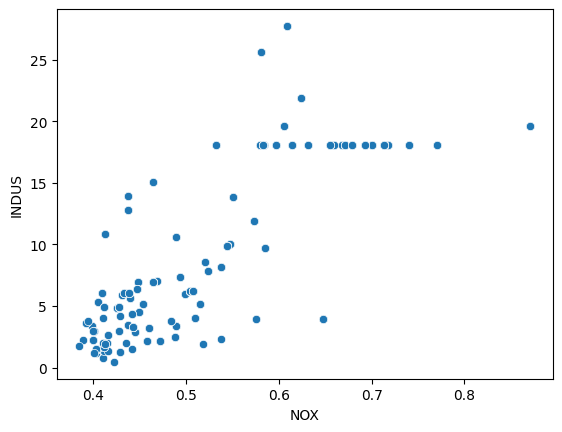

In [13]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.show()

Perform Pearson Correlation

In [14]:
corr, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson Correlation: r =", corr, ", p-value =", p_value)

Pearson Correlation: r = 0.7636514469209156 , p-value = 7.913361061235544e-98


Conclusion: p-value is less than 0.05, so there is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

# 4. Regression Analysis

Question: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

Inspect Variables

In [15]:
print(boston_df[['DIS', 'MEDV']].head())

      DIS  MEDV
0  4.0900  24.0
1  4.9671  21.6
2  4.9671  34.7
3  6.0622  33.4
4  6.0622  36.2


Fit the Regression Model

In [16]:
model = ols('MEDV ~ DIS', data=boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        23:41:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

Visualize the Regression

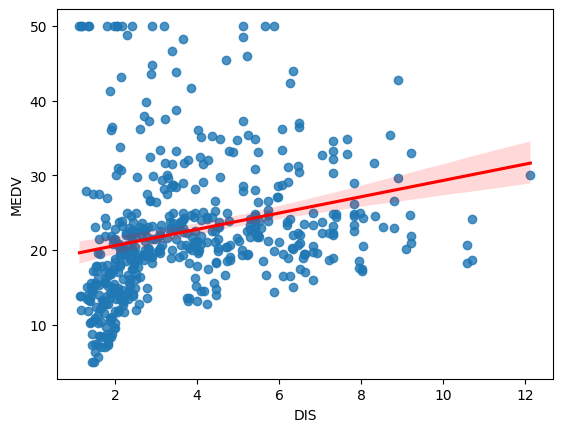

In [17]:
sns.regplot(x='DIS', y='MEDV', data=boston_df, line_kws={'color': 'red'})
pyplot.show()

Conclusion: Since the p-value is statistically significant, you can confidently say that DIS  has a significant positive relationship with MEDV.  So, as houses are farther from Boston employment centers, their median value tends to increase slightly.